In [1]:
! pip install collections-extended 
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0de48f64c930f4c9390e1a8f718ef96a82175ab052d6ce9acd1b7cafc2fb24cc
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 13.3 MB/s eta 0:00:00
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
# importing libraries
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,plot_confusion_matrix
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv('/content/dataset_es_train.csv')


In [7]:
data.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [9]:
data.shape

(10000, 8)

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         10000 non-null  object
 1   product_id        10000 non-null  object
 2   reviewer_id       10000 non-null  object
 3   stars             10000 non-null  int64 
 4   review_body       10000 non-null  object
 5   review_title      10000 non-null  object
 6   language          10000 non-null  object
 7   product_category  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [11]:
df = data[['review_body','stars']]
df

,review_body,stars
0,Muy malo ya no me funciona,1
1,Después de 3 auriculares bluetooth que se estr...,3
2,Calidad precio excepcional buen producto,5
3,Los cajones cuesta cerrarlos y pensaba que iba...,3
4,Se lo compré a mis hijos. El primero no pasó d...,1
...,...,...
9995,Tiene una tara en el cosido de la visera. He s...,1
9996,El producto llego bien y en tiempo,4
9997,Este Tv Box era para sustituir el ordenador qu...,2
9998,Muy dificil de ajustar correctamente. No queda...,1


In [12]:
df['stars'].value_counts()   # 5 star rating supportive column

3    2051
5    2042
2    2029
1    1977
4    1901
Name: stars, dtype: int64

In [13]:
def lang_detect(data):   # check the language
  lang = detect(data)
  return lang

In [14]:
print(df.review_body[0])
lang_detect(df.review_body[0])

Muy malo ya no me funciona


'es'

In [15]:
df['language'] = df.review_body.apply(lang_detect)  # apply on original data

In [16]:
df

,review_body,stars,language
0,Muy malo ya no me funciona,1,es
1,Después de 3 auriculares bluetooth que se estr...,3,es
2,Calidad precio excepcional buen producto,5,es
3,Los cajones cuesta cerrarlos y pensaba que iba...,3,es
4,Se lo compré a mis hijos. El primero no pasó d...,1,es
...,...,...,...
9995,Tiene una tara en el cosido de la visera. He s...,1,es
9996,El producto llego bien y en tiempo,4,es
9997,Este Tv Box era para sustituir el ordenador qu...,2,es
9998,Muy dificil de ajustar correctamente. No queda...,1,es


In [17]:
df.language.unique()  # https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

array(['es', 'pt', 'pl', 'en', 'it', 'so', 'ca', 'ro', 'cy', 'de', 'vi',
       'hu', 'tl', 'sk', 'id', 'lv', 'et', 'sl'], dtype=object)

In [18]:
df.language.value_counts()

es    9795
pt     116
en      25
it      15
ca      11
so       9
de       8
cy       5
vi       3
ro       2
tl       2
id       2
lv       2
pl       1
hu       1
sk       1
et       1
sl       1
Name: language, dtype: int64

In [19]:
def lang_trans(data):
  translor = Translator()
  translated_text = translor.translate(data)
  return translated_text.text

In [20]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Muy malo ya no me funciona


"Very bad it doesn't work anymore"

In [21]:
df['translated_reviews']= df.review_body.apply(lang_trans)  #transforming to english language

In [94]:
df

,review_body,stars,language,translated_reviews
0,Muy malo ya no me funciona,1,es,Very bad it doesn't work anymore
1,Después de 3 auriculares bluetooth que se estr...,3,es,After 3 bluetooth headphones that break down i...
2,Calidad precio excepcional buen producto,5,es,Exceptional quality price good product
3,Los cajones cuesta cerrarlos y pensaba que iba...,3,es,The drawers are difficult to close and I thoug...
4,Se lo compré a mis hijos. El primero no pasó d...,1,es,I bought it for my children. The first did not...
...,...,...,...,...
9995,Tiene una tara en el cosido de la visera. He s...,1,es,It has a flaw in the stitching of the visor. I...
9996,El producto llego bien y en tiempo,4,es,The product arrived well and on time
9997,Este Tv Box era para sustituir el ordenador qu...,2,es,This TV Box was to replace the computer that w...
9998,Muy dificil de ajustar correctamente. No queda...,1,es,Very difficult to adjust correctly. It doesn't...


In [ ]:
# EDA

In [22]:
def ngram_extractor(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)
  ngram_list1=[]
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1

list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))

final_unigrams = []
for unigram in list_unigrams:
  final_unigrams.extend(unigram)
cnt = Counter(final_unigrams).most_common(25)

In [23]:
cnt

[('the', 16401),
 ('.', 15503),
 (',', 14659),
 ('it', 14072),
 ('I', 9295),
 ('and', 8882),
 ('is', 7785),
 ('to', 7026),
 ('a', 6835),
 ('not', 4949),
 ('that', 4206),
 ('of', 4050),
 ('for', 3992),
 ('It', 3594),
 ('very', 3370),
 ('in', 3178),
 ('but', 3094),
 ('The', 3065),
 ('have', 3036),
 ('with', 2639),
 ('they', 2317),
 ("n't", 2273),
 ('good', 2123),
 ('you', 2119),
 ('are', 2067)]

In [24]:
# preprocessing
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text

stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text

In [25]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [26]:
clean_text

0                               [bad, not, work, anymore]
1       [bluetooth, headphones, break, weeks, probably...
2            [exceptional, quality, price, good, product]
3       [drawers, difficult, close, thought, would, li...
4       [bought, children, first, not, last, second, d...
                              ...                        
9995          [flaw, stitching, visor, requested, refund]
9996                       [product, arrived, well, time]
9997    [box, replace, computer, always, connected, no...
9998    [difficult, adjust, correctly, not, fit, well,...
9999    [mixed, ball, arrives, deflated, well, package...
Name: translated_reviews, Length: 10000, dtype: object

In [27]:
#parsing the text with the help of ngram
#analyzing unigram
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))

final_unigrams = []
for unigram in list_unigrams:
  final_unigrams.extend(unigram)
cnt = Counter(final_unigrams).most_common(25)
cnt

[('not', 7445),
 ('good', 2618),
 ('well', 1469),
 ('quality', 1449),
 ('product', 1239),
 ('one', 1231),
 ('like', 990),
 ('price', 911),
 ('use', 829),
 ('little', 777),
 ('time', 777),
 ('arrived', 776),
 ('put', 688),
 ('bought', 671),
 ('would', 641),
 ('perfect', 641),
 ('bad', 606),
 ('buy', 584),
 ('much', 556),
 ('small', 553),
 ('recommend', 552),
 ('lot', 532),
 ('work', 530),
 ('great', 526),
 ('without', 526)]

In [28]:
#analyzing bigrams
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))

final_bigrams = []
for bigram in list_bigrams:
  final_bigrams.extend(bigram)
cnt = Counter(final_bigrams).most_common(25)
cnt

[('good quality', 392),
 ('not work', 311),
 ('not know', 260),
 ('not recommend', 259),
 ('not like', 254),
 ('not fit', 181),
 ('value money', 168),
 ('not buy', 157),
 ('not even', 156),
 ('not bad', 150),
 ('good price', 140),
 ('works well', 136),
 ('poor quality', 135),
 ('good product', 134),
 ('would not', 133),
 ('long time', 128),
 ('product not', 120),
 ('not give', 115),
 ('not good', 112),
 ('not come', 103),
 ('quality price', 96),
 ('works perfectly', 89),
 ('quality not', 88),
 ('not arrived', 87),
 ('good value', 86)]

In [29]:
#analyzing trigrams
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigrams = []
for trigram in list_trigrams:
  final_trigrams.extend(trigram)
cnt = Counter(final_trigrams).most_common(25)
cnt

[('good value money', 85),
 ('not fit well', 62),
 ('would not buy', 59),
 ('good quality price', 42),
 ('not last long', 41),
 ('price not ask', 34),
 ('not work well', 33),
 ('lasts long time', 31),
 ('not give stars', 29),
 ('not good quality', 25),
 ('good quality good', 24),
 ('not ask much', 23),
 ('leaves lot desired', 22),
 ('not work not', 22),
 ('not look good', 20),
 ('not recommend purchase', 20),
 ('not cover entire', 20),
 ('not like much', 20),
 ('value money good', 19),
 ('good quality not', 17),
 ('not received yet', 17),
 ('would not recommend', 16),
 ('not used yet', 16),
 ('takes little space', 16),
 ('battery not last', 16)]

In [30]:
test = df[(df.stars<3)].reset_index(drop=True) # taking samples which has rating below 3(1 or 2) only

In [31]:
test

,review_body,stars,language,translated_reviews
0,Muy malo ya no me funciona,1,es,Very bad it doesn't work anymore
1,Se lo compré a mis hijos. El primero no pasó d...,1,es,I bought it for my children. The first did not...
2,"Es un portátil barato y ligero, pero tiene var...",2,es,"It's a cheap and light laptop, but it has seve..."
3,Absolutamente todas las cápsulas están abierta...,1,es,"Absolutely all the capsules are open, obviousl..."
4,He pedido 5 cremas y tres de ellas están caduc...,1,es,I have ordered 5 creams and three of them are ...
...,...,...,...,...
4001,Los he tenido que devolver porque son de muy m...,1,es,I had to return them because they are of very ...
4002,Tiene una tara en el cosido de la visera. He s...,1,es,It has a flaw in the stitching of the visor. I...
4003,Este Tv Box era para sustituir el ordenador qu...,2,es,This TV Box was to replace the computer that w...
4004,Muy dificil de ajustar correctamente. No queda...,1,es,Very difficult to adjust correctly. It doesn't...


In [32]:
# analyzing low rating reviews

clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigrams = []
for trigram in list_trigrams:
  final_trigrams.extend(trigram)
cnt = Counter(final_trigrams).most_common(25)
cnt

[('would not buy', 47),
 ('not fit well', 40),
 ('not work well', 24),
 ('not work not', 21),
 ('not recommend purchase', 20),
 ('not received yet', 16),
 ('leaves lot desired', 15),
 ('poor quality not', 15),
 ('not yet arrived', 15),
 ('would not recommend', 14),
 ('still not received', 14),
 ('product not arrived', 14),
 ('not good quality', 14),
 ('not last long', 13),
 ('not cover entire', 13),
 ('not like much', 13),
 ('order not arrived', 12),
 ('still not arrived', 12),
 ('not meet expectations', 11),
 ('not arrived yet', 11),
 ('price not ask', 11),
 ('battery not last', 11),
 ('not look good', 11),
 ('not look like', 11),
 ('not like anything', 10)]

In [ ]:
# R1
# R2
# 'R1 R2'
# 'w1, w2, w3, w4' >>> 'w1 w2 w3 w4'
# split >>' '.join

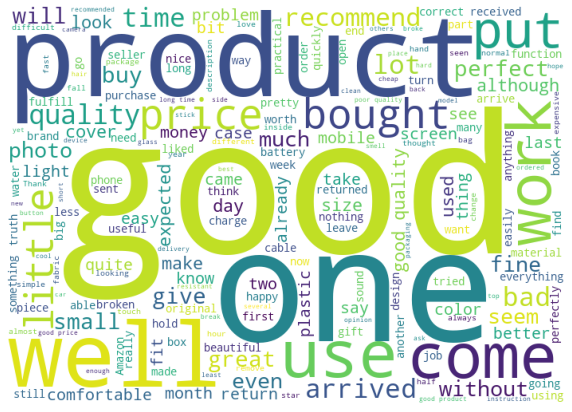

In [33]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  text = ' '.join([word for word in df_.split()])
  wordcloud = WordCloud(width=700,height=500,background_color='white').generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
wordcloud(df,'translated_reviews')

In [ ]:
#keyphrase extraction technique implementaion (unsupervised alg)
#YAKE
#RAKE

In [34]:
#YAKE
def yake_extracter(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data) # (kw,score)
  keyword_list = []
  for kw in keywords:
    keyword_list.append(kw[0])
  return keyword_list

keywords = df.translated_reviews.apply(yake_extracter)


In [35]:
keywords

0                      [work anymore, anymore, bad, work]
1       [due to sweat, involve sweating, bluetooth hea...
2       [Exceptional quality price, price good product...
3       [drawers are difficult, drawers, difficult to ...
4              [children, bought, day, week, month, died]
                              ...                        
9995    [visor, requested a refund, flaw, stitching, r...
9996            [product arrived, time, product, arrived]
9997    [replace the computer, Box, replace, computer,...
9998    [adjust correctly, difficult to adjust, correc...
9999    [mixed ball arrives, ball arrives deflated, ou...
Name: translated_reviews, Length: 10000, dtype: object

In [36]:
all_keywords = []
for kw in keywords:
  all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 1609),
 ('quality', 1209),
 ('product', 979),
 ('price', 765),
 ('arrived', 680),
 ('time', 604),
 ('bought', 558),
 ('put', 496),
 ('bad', 459),
 ('Good', 427),
 ('fine', 427),
 ('small', 426),
 ('lot', 420),
 ('works', 415),
 ('perfect', 414),
 ('work', 409),
 ('recommend', 400),
 ('buy', 398),
 ('size', 374),
 ('expected', 365),
 ('great', 364),
 ('perfectly', 338),
 ('money', 312),
 ('good quality', 293),
 ('bit', 292),
 ('comfortable', 281),
 ('broken', 278),
 ('give', 273),
 ('fit', 271),
 ('long', 268),
 ('case', 262),
 ('easy', 260),
 ('screen', 254),
 ('return', 250),
 ('photo', 246),
 ('day', 236),
 ('purchase', 234),
 ('plastic', 233),
 ('light', 232),
 ('cover', 226),
 ('thing', 215),
 ('days', 214),
 ('pretty', 211),
 ('happy', 211),
 ('box', 206),
 ('received', 206),
 ('battery', 205),
 ('fits', 201),
 ('color', 201),
 ('problem', 198),
 ('mobile', 192),
 ('gift', 190),
 ('months', 189),
 ('beautiful', 185),
 ('fast', 181),
 ('made', 178),
 ('worth', 169),
 ('ar

In [37]:
#RAKE
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

rake_keywords = df.translated_reviews.apply(rake_extractor)
rake_keywords

0                                     [work anymore, bad]
1       [low battery warning system, 3 bluetooth headp...
2                [exceptional quality price good product]
3       [little wider, would, worth, well, thought, st...
4       [third died, second day, second, week, month, ...
                              ...                        
9995          [visor, stitching, requested, refund, flaw]
9996                         [product arrived well, time]
9997    [6 years old, want something simple, understan...
9998    [dust sticks inside, air bubbles form, fit wel...
9999    [outdoor mixed ball arrives deflated, well pac...
Name: translated_reviews, Length: 10000, dtype: object

In [38]:
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('good', 751),
 ('product', 671),
 ('use', 628),
 ('price', 606),
 ('put', 573),
 ('bought', 541),
 ('one', 526),
 ('well', 525),
 ('like', 517),
 ('lot', 506),
 ('recommend', 475),
 ('fine', 384),
 ('quality', 379),
 ('work', 356),
 ('perfect', 353),
 ('buy', 348),
 ('although', 342),
 ('arrived', 340),
 ('easy', 333),
 ('know', 328),
 ('time', 326),
 ('expected', 324),
 ('return', 317),
 ('bad', 313),
 ('used', 306),
 ('good quality', 300),
 ('comfortable', 292),
 ('give', 281),
 ('see', 277),
 ('since', 276),
 ('money', 271),
 ('case', 264),
 ('small', 247),
 ('come', 246),
 ('happy', 242),
 ('would', 241),
 ('photo', 241),
 ('much', 236),
 ('problem', 226),
 ('size', 224),
 ('think', 221),
 ('little', 221),
 ('great', 220),
 ('comes', 213),
 ('received', 206),
 ('able', 205),
 ('also', 204),
 ('going', 202),
 ('purchase', 199),
 ('truth', 191),
 ('cover', 185),
 ('made', 182),
 ('beautiful', 181),
 ('returned', 181),
 ('seems', 180),
 ('mobile', 179),
 ('gift', 179),
 ('liked', 17

## preprocessing


In [39]:
df

,review_body,stars,language,translated_reviews
0,Muy malo ya no me funciona,1,es,Very bad it doesn't work anymore
1,Después de 3 auriculares bluetooth que se estr...,3,es,After 3 bluetooth headphones that break down i...
2,Calidad precio excepcional buen producto,5,es,Exceptional quality price good product
3,Los cajones cuesta cerrarlos y pensaba que iba...,3,es,The drawers are difficult to close and I thoug...
4,Se lo compré a mis hijos. El primero no pasó d...,1,es,I bought it for my children. The first did not...
...,...,...,...,...
9995,Tiene una tara en el cosido de la visera. He s...,1,es,It has a flaw in the stitching of the visor. I...
9996,El producto llego bien y en tiempo,4,es,The product arrived well and on time
9997,Este Tv Box era para sustituir el ordenador qu...,2,es,This TV Box was to replace the computer that w...
9998,Muy dificil de ajustar correctamente. No queda...,1,es,Very difficult to adjust correctly. It doesn't...


In [40]:
data= df[['translated_reviews','stars']]

In [41]:
data

,translated_reviews,stars
0,Very bad it doesn't work anymore,1
1,After 3 bluetooth headphones that break down i...,3
2,Exceptional quality price good product,5
3,The drawers are difficult to close and I thoug...,3
4,I bought it for my children. The first did not...,1
...,...,...
9995,It has a flaw in the stitching of the visor. I...,1
9996,The product arrived well and on time,4
9997,This TV Box was to replace the computer that w...,2
9998,Very difficult to adjust correctly. It doesn't...,1


In [42]:
data.stars.unique()

array([1, 3, 5, 2, 4])

In [43]:
data.stars.value_counts()

3    2051
5    2042
2    2029
1    1977
4    1901
Name: stars, dtype: int64

In [44]:
# remove newlines 
def remove_lines(data):
    clean_text =  data.replace("\n",' ').replace("\\n",' ').replace("\t",' ')
    return clean_text

# contraction mapping 
def expand_text(data):
    expanded_doc = contractions.fix(data)
    return expanded_doc

# handle accented character

def accented_char(data):
    fixed_text = unidecode(data)
    return fixed_text

# clean data \
stopword_list = stopwords.words("english")
stopword_list.remove("not")                 #removing stopwords because sentiment analysis implementation
stopword_list.remove("no")
stopword_list.remove("nor")
def clean_data(data):
    tokens = word_tokenize(data)
    normalization = [word.lower() for word in tokens]
    remove_punct = [word for word in normalization if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if len(word)>2]
    return clean_text

# lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return final_text

def join_list(data):
    return " ".join(data)




               

In [45]:
#creating target column
def target_column(data):
    if (data==1) or (data==2):
        return 0
    elif (data==3):
        return 1
    elif (data==4) or (data==5):
        return 2
data['target'] = data.stars.apply(target_column)

In [46]:
data['target']

0       0
1       1
2       2
3       1
4       0
       ..
9995    0
9996    2
9997    0
9998    0
9999    0
Name: target, Length: 10000, dtype: int64

In [67]:
#spliting data (to avoid data leakage)
x_train,x_test,y_train,y_test = train_test_split(data.translated_reviews,data.target,test_size=0.25,random_state=42)
clean_text_train = x_train.apply(remove_lines)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(accented_char)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

clean_text_train = clean_text_train.apply(join_list)

In [90]:
#feature engineering
#implementation of countvectorizer
count = CountVectorizer(max_df=0.95,max_features=5000)
count_train_val = count.fit_transform(clean_text_train)

In [91]:
count_train_val.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
#model building
mnb_count = MultinomialNB()
mnb_count.fit(count_train_val.A,y_train)
mnb_count.score(count_train_val.A,y_train)

0.7916

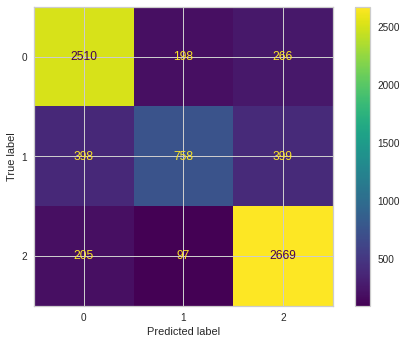

In [76]:
plot_confusion_matrix(mnb_count,count_train_val.A,y_train)

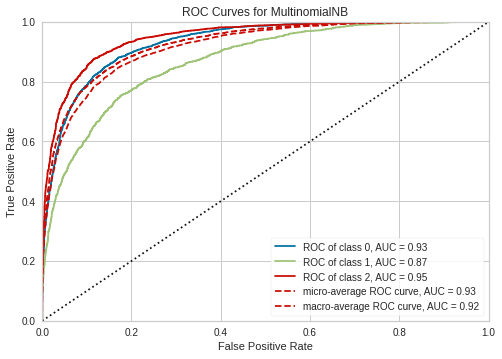

In [77]:
visualizer = ROCAUC(mnb_count)
visualizer.fit(count_train_val.A,y_train)
visualizer.score(count_train_val.A,y_train)
visualizer.show()

In [78]:
#saving countvectorizer model
import pickle 
pickle.dump(count, open('count2.pkl', "wb"))

In [79]:
#saving Multinimial NB model
import pickle 
pickle.dump(mnb_count, open('model2.pkl', "wb"))